# Python Data Engineer Code Challenge

### By: Maria Angelica Portocarrero Quintero

The purpose of this challenge is to showcase data management abilities. In this case, the main goal is to gather some useful insights about candidates who participated in selection processes. We have a CSV file from which we will get the information from, but first, it's needed to analyze, manipulate and load the data in a MySQL database with tools like SQLAlchemy, Pandas and Matplotlib.

In [1]:
import pandas as pd
import json
from sqlalchemy.orm import sessionmaker, declarative_base
from sqlalchemy import create_engine, Column, Integer, String, Boolean, Date
from sqlalchemy import func
from matplotlib import pyplot as plt

## Step I: Exploring the dataset
To begin with the challenge, we are going to perform an exploratory data analysis on our dataset to undestand our data better.

In [2]:
csv_file = "data/candidates.csv"
data = pd.read_csv(csv_file, sep=";")

In [3]:
data.shape

(50000, 10)

First, we can see that we are dealing with a dataset of 50k rows and 10 columns.

In [4]:
data.head()

,First Name,Last Name,Email,Application Date,Country,YOE,Seniority,Technology,Code Challenge Score,Technical Interview Score
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7


We can take a small peek of the dataset here.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   First Name                 50000 non-null  object
 1   Last Name                  50000 non-null  object
 2   Email                      50000 non-null  object
 3   Application Date           50000 non-null  object
 4   Country                    50000 non-null  object
 5   YOE                        50000 non-null  int64 
 6   Seniority                  50000 non-null  object
 7   Technology                 50000 non-null  object
 8   Code Challenge Score       50000 non-null  int64 
 9   Technical Interview Score  50000 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 3.8+ MB


We can see the data types of each column and also, that there are no nulls for any of the columns.

In [10]:
num_cols = data.select_dtypes(include=['int64'])
num_desc = num_cols.describe().round(3)
num_desc

,YOE,Code Challenge Score,Technical Interview Score
count,50000.000,50000.000,50000.000
mean,15.287,4.996,5.004
std,8.831,3.167,3.165
min,0.000,0.000,0.000
25%,8.000,2.000,2.000
50%,15.000,5.000,5.000
75%,23.000,8.000,8.000
max,30.000,10.000,10.000


Here we can see for instance that the average number of years of experience is approximately 15 years, that the candiadte with the most experience dedicated 30 years to their labor and that the 23% of candidates have less than 8 years of experience while 75% of the candidates have less than 23 years of experience.

In addition, we can see that both scores are very similar in terms of distribution, this suggests that candidates tend to have similar performance on both tests, however this doesn't guarantee that these values are strongly correlated and more analysis would be needed to determine that accurately.

In [8]:
num_cols = data.select_dtypes(include=['object'])
num_desc = num_cols.describe()
num_desc

,First Name,Last Name,Email,Application Date,Country,Seniority,Technology
count,50000,50000,50000,50000,50000,50000,50000
unique,3007,474,49833,1646,244,7,24
top,Sarai,Murazik,fern70@gmail.com,2020-07-07,Malawi,Intern,Game Development
freq,33,138,3,50,242,7255,3818


Here, the most relevant information is that there are 7 kinds of seniority levels and 24 technologies, being Intern and Game Development the most repeated respectively.

In [11]:
data.nunique()

First Name                    3007
Last Name                      474
Email                        49833
Application Date              1646
Country                        244
YOE                             31
Seniority                        7
Technology                      24
Code Challenge Score            11
Technical Interview Score       11
dtype: int64

In this part, we can see for all columns, the unique values.

This dataset covers data from a perdiod of time. In order to provide proper context to the insights, we need to see the range of the dates.

In [15]:
first = data['Application Date'].min()
last = data['Application Date'].max()
print(f"The data covers a period from {first} towards {last}.")

The data covers a period from 2018-01-01 towards 2022-07-04.


As we can see, we have gathered very useful information about our dataset. It is important to notice that there's not a column that tells us whether the candidate was hired or not which is important for our project. However, we have the right information to tell. In order to make future queries easier, we are going to create a new column named 'hired' later.

## Step II: Establishing a connection to the database and creating the table
NOTE: For this step, it's necessary to have previously created a file with your database credentials. In this case, this file is called db_config.json and contains the username, password, host, port and database name.

In [156]:
# establecer la conexión
with open('./db_config.json', 'r') as file:
    data = json.load(file)

engine = create_engine(f'mysql://{data["user"]}:{data["password"]}@{data["host"]}:{data["server"]}/{data["db"]}')

# Para que una clase pueda considerarse un modelo, debe heredar de otra clase, en este caso la clase Base
Base = declarative_base()

# Crear el modelo
class Candidate(Base):
    __tablename__ = "candidates" # atributo tablename -> indicar el nombre de la tabla

    id = Column(Integer, primary_key=True, autoincrement=True)
    first_name = Column(String(50), nullable=False)
    last_name = Column(String(50), nullable=False)
    email = Column(String(50), nullable=False)
    app_date = Column(Date, nullable=False)
    country = Column(String(60), nullable=False)
    yoe = Column(Integer, nullable=False)
    seniority = Column(String(20), nullable=False)
    technology = Column(String(50), nullable=False)
    cc_score = Column(Integer, nullable=False)
    ti_score = Column(Integer, nullable=False)
    hired = Column(Boolean, nullable=False)

# crear la tabla
Base.metadata.create_all(bind=engine)


## Step III: Modifying and inserting data into the table
First, we are going to change the names of the columns in the dataframe to match the names of the columns in the table, then we are going to create the column "hired". 

> **Note:**  A candidate is considered HIRED when she or he has both scores greater than or equal to 7.
> 

In [47]:
file = "data/candidates.csv"
df = pd.read_csv(file, sep=";")

# renaming the columns
df.columns = ["first_name","last_name","email","app_date","country","yoe","seniority","technology","cc_score","ti_score"]

# creating hired column
df['hired'] = ((df['cc_score'] >= 7) & (df['ti_score'] >= 7)).astype(int)
print(df[0:3])

df.to_sql(con=engine,name=Candidate.__tablename__,index=False)
# params: con=engine connected to the db, name=table name to insert, index=False= remove the default index of pandas dfs.

   first_name  last_name                     email    app_date  country  yoe  \
0  Bernadette  Langworth       leonard91@yahoo.com  2021-02-26   Norway    2   
1      Camryn   Reynolds       zelda56@hotmail.com  2021-09-09   Panama   10   
2       Larue     Spinka  okey_schultz41@gmail.com  2020-04-14  Belarus    4   

   seniority      technology  cc_score  ti_score  hired  
0     Intern   Data Engineer         3         3      0  
1     Intern   Data Engineer         2        10      0  
2  Mid-Level  Client Success        10         9      1  


50000

## Step IV: Visulizations

### IV.I Hires by technology (Pie chart)

                          technology  hires
0                     Client Success    271
1  Social Media Community Management    237
2              System Administration    293
3                   Game Development    519
4                             Design    249


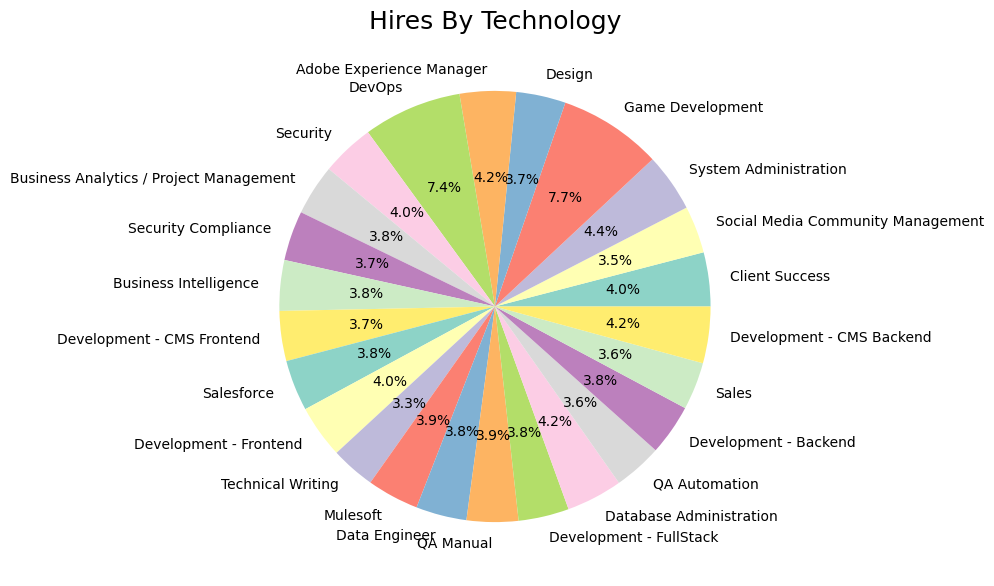

In [153]:
Session = sessionmaker(bind=engine) # clase sesión -> ("puente" entre la conexión y los modelos)
session = Session()

hires_by_tech = session.query(Candidate.technology, func.count(Candidate.id).label('hires'))\
    .filter(Candidate.hired == 1)\
    .group_by(Candidate.technology)\
    .all()

# for row in hires_by_tech:
#     print(row.technology, row.hires)
session.close()

# VISUALIZATION

# turninig into a df
df = pd.DataFrame(hires_by_tech, columns=['technology', 'hires'])
print(df[0:5])

# plotting
colormap = plt.colormaps.get_cmap('Set3')

fig = plt.figure(figsize =(10, 7))
plt.pie(df['hires'], labels = df['technology'], autopct='%1.1f%%', colors=colormap.colors)

plt.title('Hires By Technology', fontsize=18)
plt.show()

### IV.II: Hires by year

   year  hires
0  2018   1409
1  2019   1524
2  2020   1485
3  2021   1485
4  2022    795


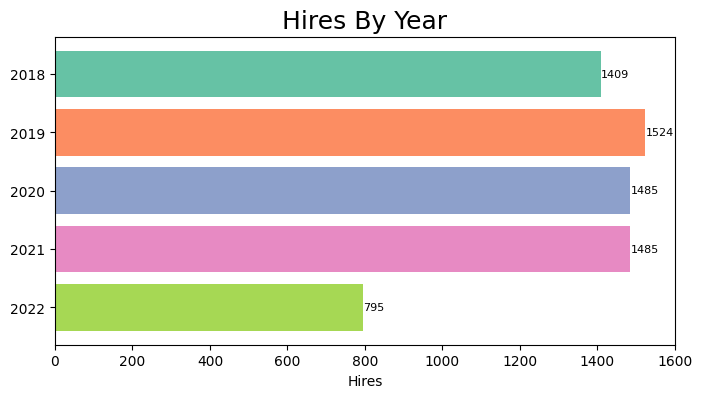

In [88]:
Session = sessionmaker(bind=engine) # clase sesión -> ("puente" entre la conexión y los modelos)
session = Session()

# applying fucntion YEAR to take the year out of the date data
year= func.YEAR(Candidate.app_date)

hires_by_year = session.query(year.label('year'), func.count(Candidate.id).label('hires'))\
    .filter(Candidate.hired == 1)\
    .group_by(year)\
    .order_by(year)\
    .all()

session.close()

# VISUALIZATION

# turninig into a df
df = pd.DataFrame(hires_by_year, columns=['year', 'hires'])
print(df)

# plotting
colormap = plt.colormaps.get_cmap('Set2')
fig, ax = plt.subplots(figsize=(8, 4))

plot = ax.barh(df['year'], df['hires'], align='center', color=colormap.colors)

ax.invert_yaxis()
for bar in plot:
    value = bar.get_width()  # bar valuee
    y_position = bar.get_y() + bar.get_height() / 2 
    ax.text(value, y_position, f'{value:.0f}', va='center', ha='left', fontsize=8, color='black')

ax.set_xlabel('Hires')
plt.title('Hires By Year', fontsize=18)
plt.show()

### Step IV.III: Hires by seniority

   seniority  hires
0  Mid-Level    924
1       Lead    929
2     Junior    977
3     Senior    939
4    Trainee    973
5     Intern    985
6  Architect    971


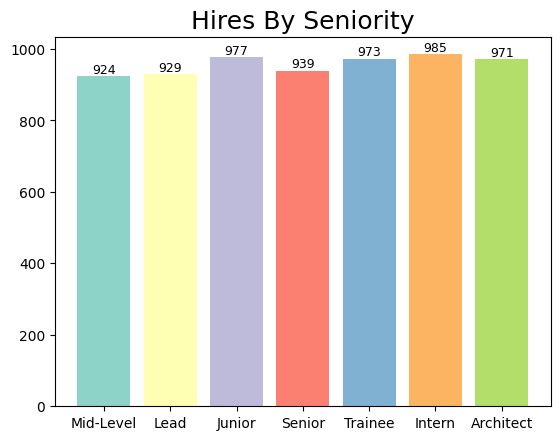

In [127]:
Session = sessionmaker(bind=engine) # clase sesión -> ("puente" entre la conexión y los modelos)
session = Session()

# SELECT seniority, COUNT(*) AS hires FROM candidates WHERE hired = 1 GROUP BY seniority;

hires_by_seniority = session.query(Candidate.seniority, func.count(Candidate.id).label('hires'))\
    .filter(Candidate.hired == 1)\
    .group_by(Candidate.seniority)\
    .all()

session.close()

# VISUALIZATION

# turninig into a df
df = pd.DataFrame(hires_by_seniority)
print(df)

# plotting
colormap = plt.colormaps.get_cmap('Set3')
fig, ax = plt.subplots()

plot = ax.bar(df['seniority'], df['hires'], color=colormap.colors)
ax.bar_label(plot, labels=df['hires'], label_type='edge', fontsize=9)

plt.title('Hires By Seniority', fontsize=18)
plt.show()

### Step IV.IV: Hires by Country over years

    year                   country  hires
0   2018                    Brazil      9
1   2018                  Colombia      7
2   2018                   Ecuador      1
3   2018  United States of America      5
4   2019                    Brazil      7
5   2019                  Colombia      8
6   2019                   Ecuador      3
7   2019  United States of America      3
8   2020                    Brazil      6
9   2020                  Colombia      8
10  2020                   Ecuador      8
11  2020  United States of America      4
12  2021                    Brazil      7
13  2021                  Colombia      1
14  2021                   Ecuador      5
15  2021  United States of America      8
16  2022                    Brazil      4
17  2022                  Colombia      1
18  2022                   Ecuador      3
19  2022  United States of America      5


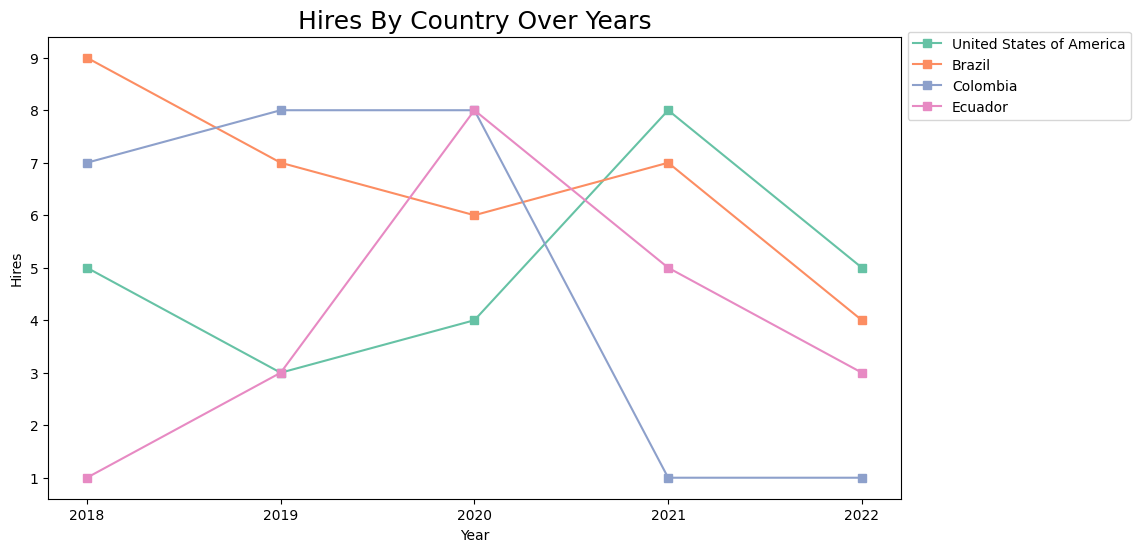

In [154]:
Session = sessionmaker(bind=engine) # clase sesión -> ("puente" entre la conexión y los modelos)
session = Session()

countries = ['United States of America', 'Brazil', 'Colombia', 'Ecuador']

# applying fucntion YEAR to take the year out of the date data
year= func.YEAR(Candidate.app_date)

hires_by_country = session.query(
    year.label('year'),
    Candidate.country,
    func.count(Candidate.id).label('hires')
).filter(
    Candidate.hired == 1,
    Candidate.country.in_(countries)
).group_by(
    'year', 'country'
).order_by(
    'year'
).all()

# for row in hires_by_country:
#     print(row.year, row.country, row.hires)
session.close()

#VISUALIZATION
df = pd.DataFrame(hires_by_country)
print(df)

colormap = plt.colormaps.get_cmap('Set2')
fig, ax = plt.subplots(figsize=(11, 6))

for i, country in enumerate(countries):
    country_data = df[df['country'] == country]
    ax.plot(country_data['year'], country_data['hires'], label=country, marker='s', color=colormap(i))

ax.set_xlabel('Year')
ax.set_ylabel('Hires')
plt.title('Hires By Country Over Years', fontsize=18)
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True)) # to get only integers for the years

ax.legend(bbox_to_anchor=(0.9, 0.9),
          bbox_transform=fig.transFigure) # placing the legend outside the plot, at the top right

plt.show()
